In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("22-diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Content: 

- price price in US dollars (\$326--\$18,823)

- carat weight of the diamond (0.2--5.01)

- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color diamond colour, from J (worst) to D (best)

- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x length in mm (0--10.74)

- y width in mm (0--58.9)

- z depth in mm (0--31.8)

- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table width of top of diamond relative to widest point (43--95)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- x, y ve z gibi değerler uzunluk birimi bu yüzden sıfır olamazlar çünkü 0 olurlarsa elmas olmaz yani :)

In [9]:
df[df['x'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [10]:
df[df['y'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [11]:
df[df['z'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [12]:
df.drop(index=df[df.x==0].index, inplace=True)
df.drop(index=df[df.y==0].index, inplace=True)
df.drop(index=df[df.z==0].index, inplace=True)

In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- Şimdi burada kendi yorumum olarak bakınca max değerler, mean değerler, %75 değerlere bakınca sadece tablo üzerinden;

    - carat
    - table
    - y
    - z

değişkenlerinde outliers görüyorum. Bunları scatterplot ile inceleyip data setinden şutlacayağım.

## Outliers

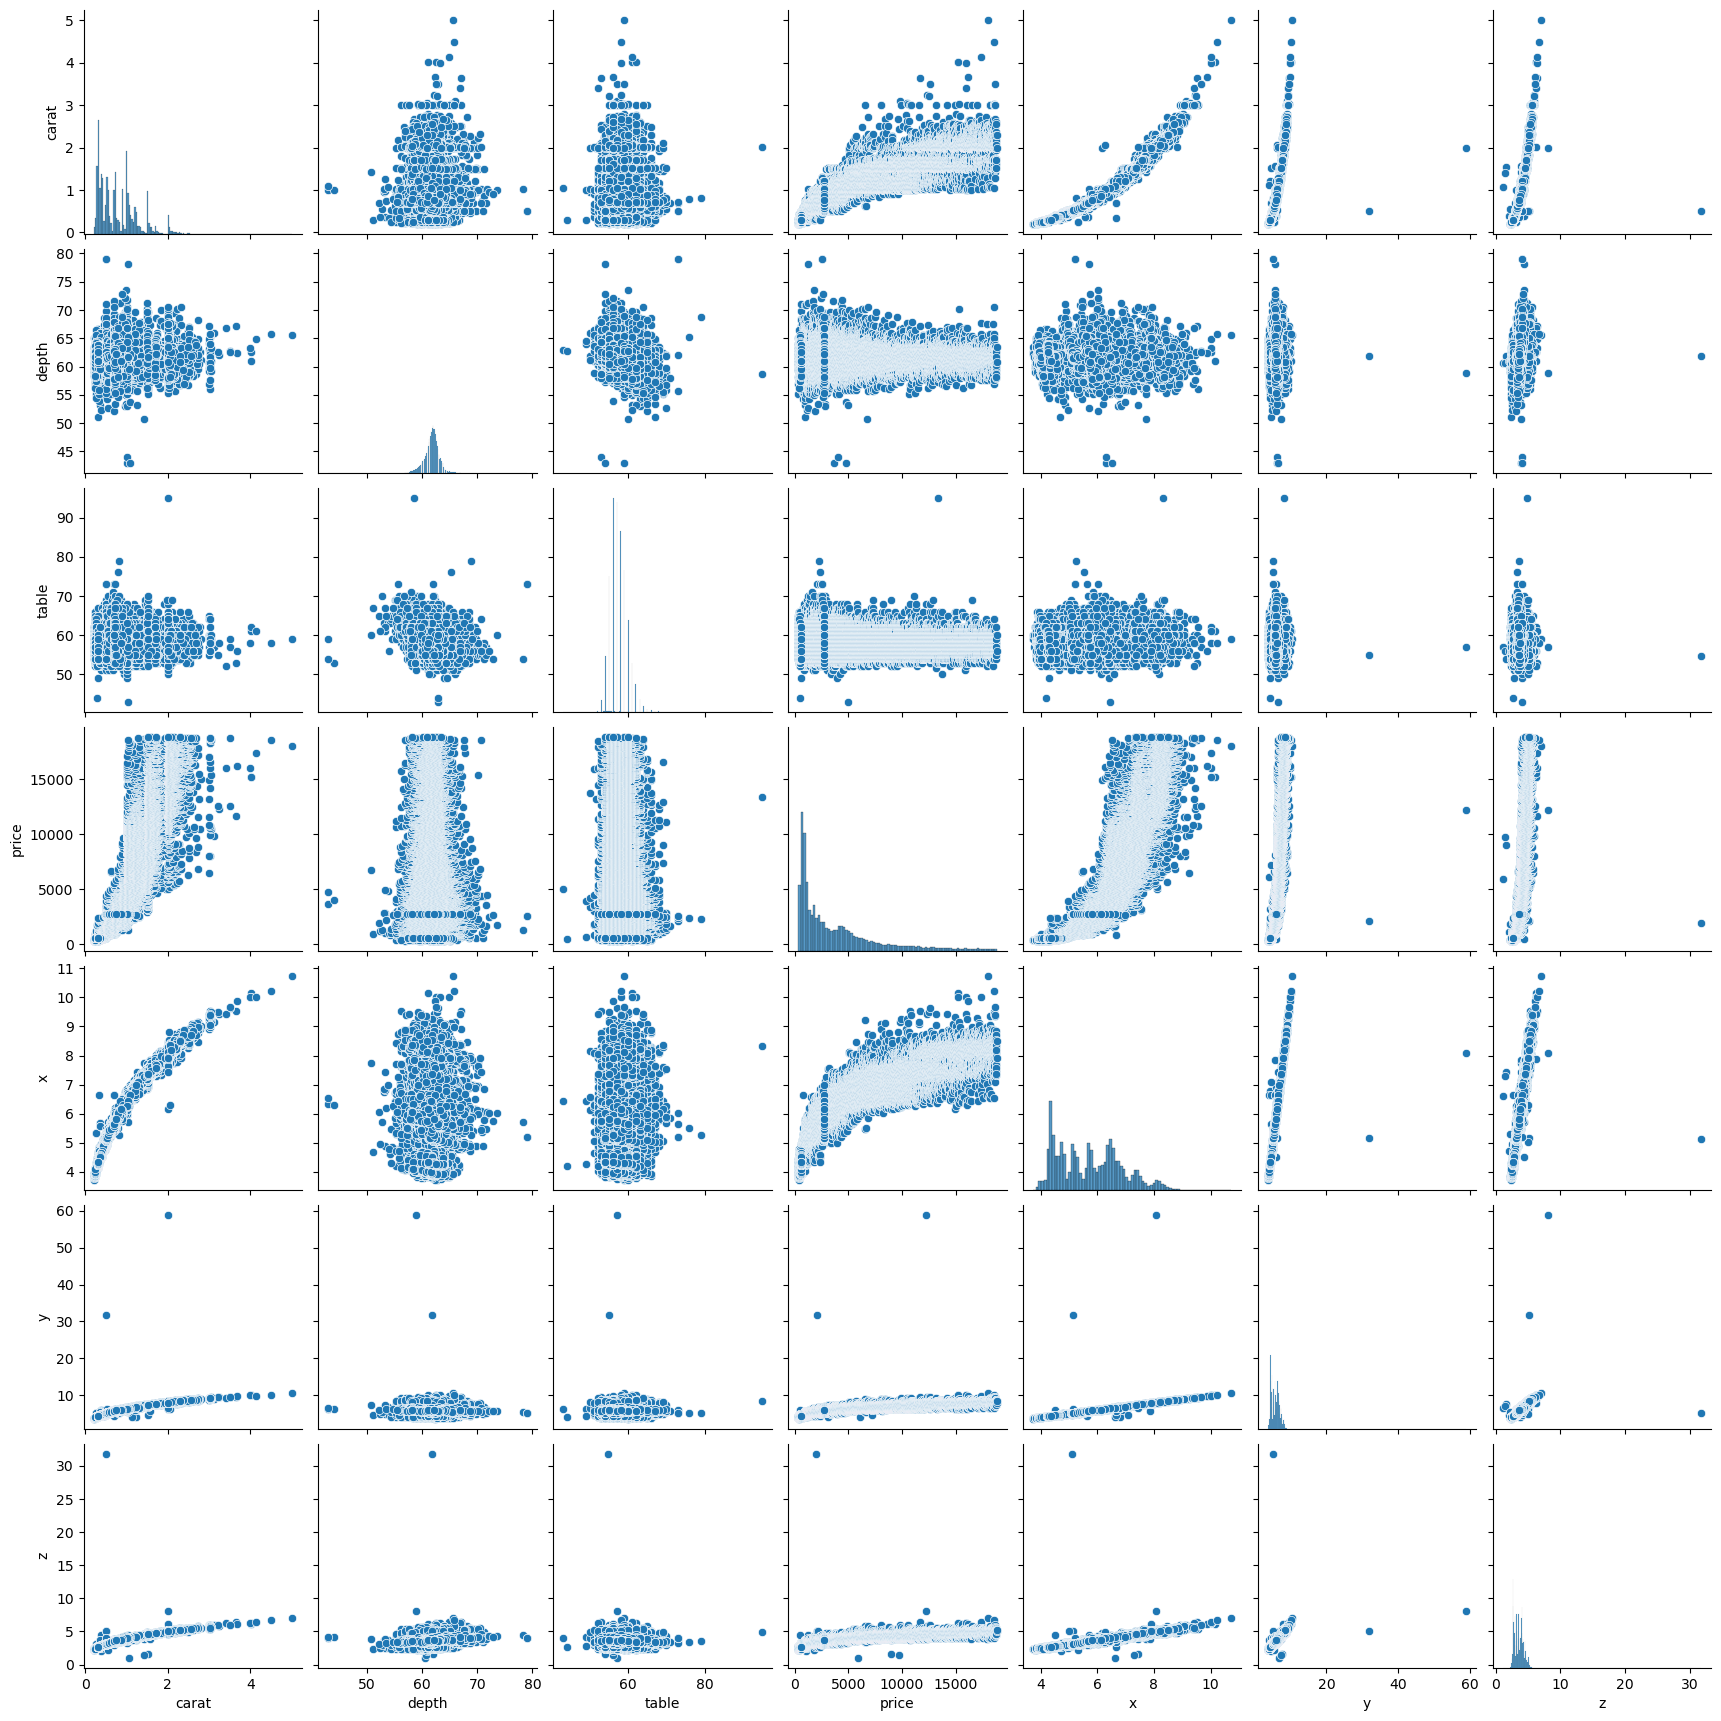

In [14]:

sns.pairplot(df)
plt.show()

### Carat Outliers

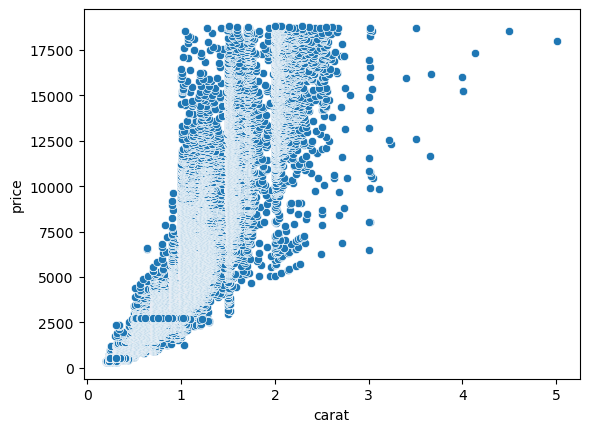

In [15]:
sns.scatterplot(df,x='carat', y='price')
plt.show()

In [16]:
len(df[df['carat'] < 4])

53914

### Table Outliers

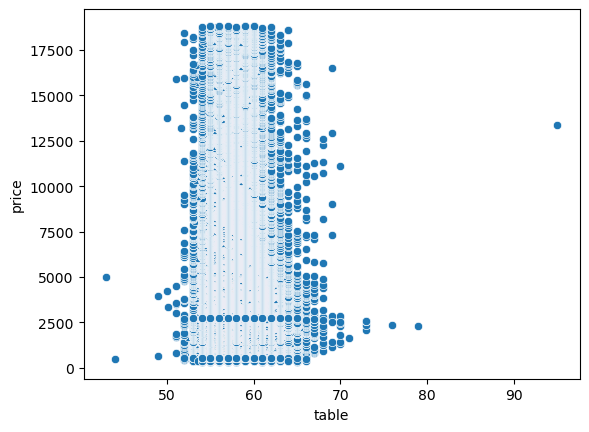

In [17]:
sns.scatterplot(df,x='table', y='price')
plt.show()

In [18]:
len(df[(df['table'] < 75) & (df['table'] > 45)])

53915

### y outliers

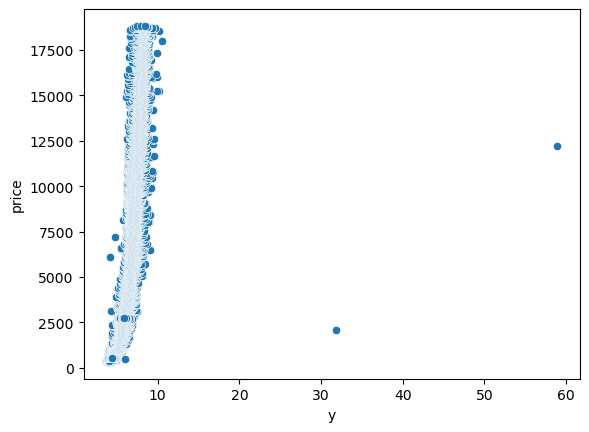

In [19]:
sns.scatterplot(df,x='y', y='price')
plt.show()

In [20]:
len(df[(df['y'] < 20)])

53918

### z outliers

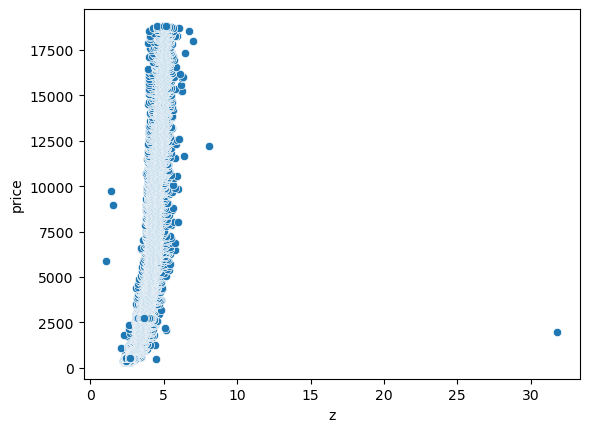

In [21]:
sns.scatterplot(df,x='z', y='price')
plt.show()

In [22]:
len(df[(df['z'] < 10) & (df['z'] > 2)])

53916

In [23]:
df = df[df['carat'] < 4]
df = df[(df['table'] < 75) & (df['table'] > 45)]
df = df[(df['y'] < 20)]
df = df[(df['z'] < 10) & (df['z'] > 2)]

In [24]:
df.describe()

,carat,depth,table,price,x,y,z
count,53903.000000,53903.000000,53903.000000,53903.000000,53903.000000,53903.000000,53903.000000
mean,0.797252,61.749194,57.455852,3929.177207,5.731011,5.732854,3.539190
std,0.472344,1.431724,2.223244,3985.027924,1.118423,1.110328,0.690774
min,0.200000,43.000000,49.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5321.000000,6.540000,6.540000,4.040000
max,3.670000,79.000000,73.000000,18823.000000,9.860000,9.810000,6.380000


## Categorical Variables

In [25]:
categorical = []

for col in df.columns:
    if df[col].dtype == 'O':
        categorical.append(col)

In [26]:
categorical

['cut', 'color', 'clarity']

In [27]:
for i in categorical:
    print(df[i].value_counts())

cut
Ideal        21543
Premium      13777
Very Good    12078
Good          4902
Fair          1603
Name: count, dtype: int64
color
G    11283
E     9794
F     9535
H     8295
D     6774
I     5417
J     2805
Name: count, dtype: int64
clarity
SI1     13059
VS2     12254
SI2      9183
VS1      8165
VVS2     5066
VVS1     3654
IF       1790
I1        732
Name: count, dtype: int64


- Hoca burada One Hot Encoding de yapılabilir dedi ama ben Label yapcağım dedi bu seferlik.

- BU KISIM ÖNEMLİ. Data Leakage olmaması açısından encoding işlemini X_train data seti üzerinde yapmak gerek. O yüzden önce split yapacağız.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('price', axis =1)
y = df.price

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
labelEncoder = LabelEncoder()

In [33]:
for col in categorical:
    X_train[col] = labelEncoder.fit_transform(X_train[col])
    X_test[col] = labelEncoder.transform(X_test[col])

In [34]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
38414,0.39,3,0,5,61.4,60.0,4.72,4.70,2.89
15198,1.01,4,3,5,61.9,56.0,6.34,6.42,3.95
14630,0.90,2,4,4,60.4,57.0,6.27,6.29,3.79
19149,1.55,3,6,5,60.7,59.0,7.47,7.50,4.54
29302,0.30,2,5,5,62.1,54.0,4.32,4.35,2.69


In [35]:
X_train.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000,40427.000000
mean,0.794797,2.547951,2.586217,3.836669,61.753395,57.443993,5.725412,5.727400,3.536102
std,0.470751,1.025184,1.701651,1.721094,1.423694,2.215766,1.115065,1.107015,0.689408
min,0.200000,0.000000,0.000000,0.000000,43.000000,49.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.530000,6.530000,4.030000
max,3.670000,4.000000,6.000000,7.000000,79.000000,73.000000,9.860000,9.810000,6.380000


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40427 entries, 38414 to 7628
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40427 non-null  float64
 1   cut      40427 non-null  int32  
 2   color    40427 non-null  int32  
 3   clarity  40427 non-null  int32  
 4   depth    40427 non-null  float64
 5   table    40427 non-null  float64
 6   x        40427 non-null  float64
 7   y        40427 non-null  float64
 8   z        40427 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 2.6 MB


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 : 0.8896654368833996
mse : 1796935.1958116286
mae : 859.9828638289089


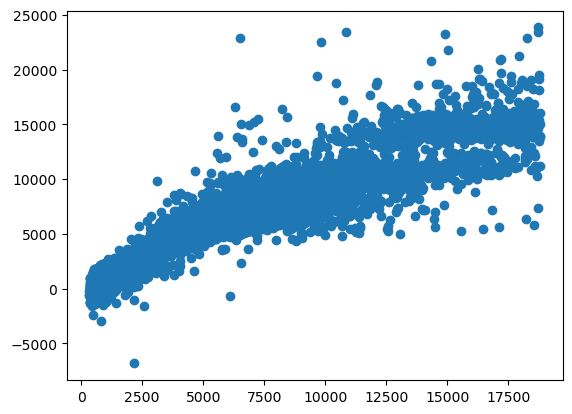

In [42]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
print("r2 :", r2_score(y_test, y_pred))
print("mse :", mean_squared_error(y_test, y_pred))
print("mae :", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

### SVM Regression

In [43]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
print("r2 :", r2_score(y_test, y_pred))
print("mse :", mean_squared_error(y_test, y_pred))
print("mae :", mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "kernel" : ['linear', 'rbf'],
    "gamma" : ['scale', 'auto'],
    "C" : [1000, 100, 10, 1, 0.1]
}

In [ ]:
grid = GridSearchCV(estimator=SVR(), param_grid=param_grid, n_jobs=-1, verbose=3, refit=True)

In [ ]:
grid.fit(X_train_scaled, y_train)

In [ ]:
grid.best_params_

In [ ]:
y_pred=grid.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()